# NLP Analyse_de_commentaires_produits



Je vais extraire des informations pertinentes contenues dans des avis de produits distribués par des sites d’e-commerce. Si notre outil est correct il pourrait apporter des informations sur les facteurs de réussite ou d’échec d’un produit.

Projet : 
- Scrap 
- Nettoyage de texte 
- Word_count // tf_idf
 

Méthodologie :
- 1) Scraper de la data (des textes écrits par des consommateurs)
- 2) Nettoyage de cette data brute
- 3) Nettoyage spécifique pour de l’analyse de texte
- 4) Utilisation
 un word_count pour extraire les mots les plus utilisés de chaque avis

### La collecte de données

Un des moyens le plus efficace pour récuperer des données textuelles est la collecte de données sur le net. Nous pouvons collecter et automatiser cette collecte par du scrapping (une des technique de collectes).

Je vais collecter un maximum de commentaires concernant des produits.

Ci dessous des adresses des pages à scrapper :

https://www.amazon.fr/Samsung-Galaxy-Dual-32GB-SM-A105F/product-reviews/B07KWX9GNV/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1&sortBy=recent


https://www.amazon.fr/Huawei-2019-Smartphone-D%C3%A9bloqu%C3%A9-pouces/product-reviews/B07N8SRLVX/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1

Installation des librairies

In [7]:
import requests
from bs4 import BeautifulSoup
import time
import random
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [8]:
head={'Accept':'text/html,application/xhtml+xm…ml;q=0.9,image/webp,*/*;q=0.8'.encode('cp1252'),
'Accept-Encoding':'gzip, deflate, br'.encode('cp1252'),
'Accept-Language':'fr,fr-FR;q=0.8,en-US;q=0.5,en;q=0.3'.encode('cp1252'),
'User-Agent':'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:82.0) Gecko/20100101 Firefox/82.0'.encode('cp1252')}


Requeste au serveur web amazon puis parser la page avec BeautifulSoup

In [9]:
url="https://www.amazon.fr/Samsung-Galaxy-Dual-32GB-SM-A105F/product-reviews/B07KWX9GNV/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1&sortBy=recent"

r=requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

Cette sequence permet de recuperer les informations suivantes sur une page de commentaire produit
- commentaire
- fiablité du commentaire
- utilisateur
- produit
- date de commentaire
- evaluation du produit par l'utilisateur

In [10]:
comm=[]
fiable=[]
user=[]
prod=[]
date=[]
score=[]

for elem in soup.findAll('span',{'data-hook':'review-body'}) :
        comm.append(elem.text.strip())
        prod.append('Samsung')
        
for elem in soup.findAll('span',{'class':'a-profile-name'})[2:] :
        user.append(elem.text)
        
for elem in soup.findAll('span',{'data-hook':'review-date'}) :
        date.append(elem.text)


for elem in soup.findAll('a',{'class':'a-link-normal'}) :
        try:
            score.append(elem('i')[0].text.split(' sur')[0].replace(',','.'))
        except:
            continue
        
for elem in soup.findAll('div',{'class':'a-section celwidget'}):
    tmp='Achat vérifié'
    if tmp in str(elem):
        fiable.append("Achat vérifié")
    else:
        fiable.append(" ? ")
        
print(len(comm),len(prod),len(fiable),len(user),len(date),len(score))

10 10 10 10 10 10


Nous allons maintenant généraliser cette collecte à un maximum de page

In [11]:
for elem in soup.findAll('div',{'data-hook':'total-review-count'}) :
    print(elem.text)

7 479 évaluations


En divisant le nombre total de commentaires par 10, nous obtenons le nombre max de requetes à envoyer au server web amazon

In [12]:
comm=[]
fiable=[]
user=[]
prod=[]
date=[]
score=[]

for i in range(1,500):
    
    url="https://www.amazon.fr/Samsung-Galaxy-Dual-32GB-SM-A105F/product-reviews/B07KWX9GNV/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber={}&sortBy=recent".format(i)
    r=requests.get(url, headers=head)
    time.sleep(random.randrange(1, 2))
    print(url)
    print(r.status_code)
    soup = BeautifulSoup(r.content,"html.parser")

    for elem in soup.findAll('span',{'data-hook':'review-body'}) :
        comm.append(elem.text.strip())
        prod.append('Samsung')

    for elem in soup.findAll('div',{'class':'a-section celwidget'}):
        tmp='Achat vérifié'
        if tmp in str(elem):
            fiable.append("Achat vérifié")
        else:
            fiable.append(" ? ")

    for elem in soup.findAll('span',{'class':'a-profile-name'})[2:] :
        user.append(elem.text)

    for elem in soup.findAll('span',{'data-hook':'review-date'}) :
        date.append(elem.text)


    for elem in soup.findAll('a',{'class':'a-link-normal'}) :
        try:
            score.append(elem('i')[0].text.split(' sur')[0].replace(',','.'))
            elem.text.split(' étoile')[1]
            print(elem('i')[0].text.split(' sur')[0].replace(',','.'))
        except:
            continue

    
    # Je controle la longueur des listes à chaque page pour identifier une eventuelles interception (degradation de la collecte)
    print(len(comm),len(prod),len(fiable),len(user),len(date),len(score))

    # S'il y a un decalage sur l'indexation des elements de chaque liste, j'arrette la collecte
    if sum(list((len(comm),len(prod),len(fiable),len(user),len(date),len(score))))!= len(comm)*6:
        #mini=min(list((len(comm),len(prod),len(fiable),len(user),len(date),len(score))))
        mini=(i-1)*10
        comm=comm[:mini]
        fiable=fiable[:mini]
        user=user[:mini]
        prod=prod[:mini]
        date=date[:mini]
        score=score[:mini]
        print("pb listes c est fini")
        break

https://www.amazon.fr/Samsung-Galaxy-Dual-32GB-SM-A105F/product-reviews/B07KWX9GNV/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1&sortBy=recent
200
10 10 10 10 10 10
https://www.amazon.fr/Samsung-Galaxy-Dual-32GB-SM-A105F/product-reviews/B07KWX9GNV/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=2&sortBy=recent
200
20 20 20 20 20 20
https://www.amazon.fr/Samsung-Galaxy-Dual-32GB-SM-A105F/product-reviews/B07KWX9GNV/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=3&sortBy=recent
200
30 30 30 30 30 30
https://www.amazon.fr/Samsung-Galaxy-Dual-32GB-SM-A105F/product-reviews/B07KWX9GNV/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=4&sortBy=recent
200
40 40 40 40 40 40
https://www.amazon.fr/Samsung-Galaxy-Dual-32GB-SM-A105F/product-reviews/B07KWX9GNV/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=5&sortBy=recent
200
50 50 50 50 50 50


In [13]:
Sam=pd.DataFrame({"Produit":prod[:mini],"Utilisateur":user[:mini],"Date":date[:mini],"Fiabilité":fiable[:mini],"Score":score[:mini],"Commentaire":comm[:mini]})
Sam

,Produit,Utilisateur,Date,Fiabilité,Score,Commentaire
0,Samsung,Tarakhil azam khan,Commenté en France le 7 mai 2022,Achat vérifié,5.0,Très bon très joli
1,Samsung,NOEL,Commenté en France le 18 avril 2022,Achat vérifié,4.0,Rien à dire
2,Samsung,Client d'Amazon,Commenté en France le 15 avril 2022,Achat vérifié,1.0,Téléphone qui ne capte rien marche très mal pa...
3,Samsung,Ramette G.,Commenté en France le 11 avril 2022,Achat vérifié,5.0,Téléphone impeccable rien à dire sa fait 2ans ...
4,Samsung,D 402,Commenté en France le 9 avril 2022,Achat vérifié,1.0,ne marche plus au bout de 2ans.samsung de la m...
...,...,...,...,...,...,...
65,Samsung,Ki Sawyer,Commenté en France le 10 novembre 2020,Achat vérifié,3.0,Ce téléphone portable est très bien et fonctio...
66,Samsung,PAQUET,Commenté en France le 8 novembre 2020,Achat vérifié,3.0,Telephone très bien sans soucis
67,Samsung,Lesvan,Commenté en France le 8 novembre 2020,Achat vérifié,5.0,bonne taille même si au départ il m a paru gra...
68,Samsung,yanns,Commenté en France le 7 novembre 2020,Achat vérifié,5.0,Je suis très content de ce produit par contre ...


Sauvegardons ce DataFrame

In [14]:
Sam.to_csv('Samsung_nov_2021',index=False)

Observons rapidement la repartition des données

In [15]:
Sam['Fiabilité'].value_counts()

Achat vérifié    69
 ?                1
Name: Fiabilité, dtype: int64

In [16]:
Sam['Score'].value_counts()

5.0    37
4.0    15
1.0    11
3.0     6
2.0     1
Name: Score, dtype: int64

Longueur des commentaires (caracteres)

In [17]:
Sam['long_str'] = Sam['Commentaire'].apply(lambda x: len(x.split(' ')))
Sam.head(5)

,Produit,Utilisateur,Date,Fiabilité,Score,Commentaire,long_str
0,Samsung,Tarakhil azam khan,Commenté en France le 7 mai 2022,Achat vérifié,5.0,Très bon très joli,4
1,Samsung,NOEL,Commenté en France le 18 avril 2022,Achat vérifié,4.0,Rien à dire,3
2,Samsung,Client d'Amazon,Commenté en France le 15 avril 2022,Achat vérifié,1.0,Téléphone qui ne capte rien marche très mal pa...,13
3,Samsung,Ramette G.,Commenté en France le 11 avril 2022,Achat vérifié,5.0,Téléphone impeccable rien à dire sa fait 2ans ...,20
4,Samsung,D 402,Commenté en France le 9 avril 2022,Achat vérifié,1.0,ne marche plus au bout de 2ans.samsung de la m...,10


(0.0, 100.0)

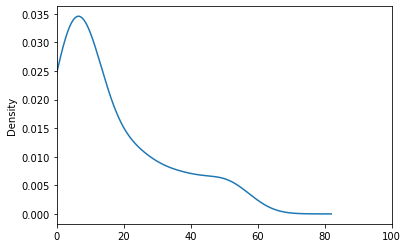

In [19]:
Sam['long_str'].plot(kind='kde').set_xlim(0,100)

Distribution des valeurs de label

5.0    37
4.0    15
1.0    11
3.0     6
2.0     1
Name: Score, dtype: int64

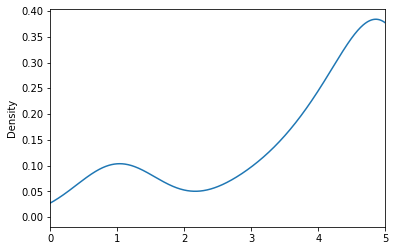

In [21]:
Sam['Score'].astype(float).plot(kind='kde').set_xlim(0, 5);Sam['Score'].value_counts()

Y a t il des commentaires dedondants ?

In [22]:
print(Sam.shape)
Sam.drop_duplicates(['Commentaire'],keep='first',inplace=True)
print(Sam.shape)

(70, 7)
(70, 7)


### Création d'un corpus et nettoyage pertinent du texte

nb: Corpus: Ensemble de documents, artistiques ou non (textes, images, vidéos, etc.), regroupés dans une optique précise.

Nous definissons ici notre corpus, celui qui sera utilisé pour réaliser notre étude et extraire des termes qui les caracterisent le mieux. 

Commencons par nettoyer notre texte d'information peu pertinente. 

Enlevons les mots neutres semantiquement pour notre étude : "Le,la,les, .." (stop-words), les chiffres, les caracteres speciaux, ...

Ci dessous un lien illustrant ces techniques avec plusiseurs librairies de NLP (NLTK,Spacy,TextBlob)
https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/

Dans notre lancée, reduisons encore la taille de notre vocabulaire en enlevant tous les accents de nos textes :
énervé ==> enerve (**Normalisation**) avec la librairie unidecode


 Importer une liste de Stop words stop-w_fr.txt


In [24]:
with open('stop-w_fr.txt',"r",encoding="utf8") as f:
    stop=f.read().split('\n')
stop.remove('haut')
stop.remove('pas')
stop.remove('ne')
stop.remove('n')
stop.remove('ni')
stop.remove('peu')
stop.remove('bon')
stop.remove('très')
stop.remove('même')
stop.remove('fait')
stop.remove('début')
stop.remove('mais')
stop.remove('dès')

stop.remove('premier')
stop.remove('première')
stop.remove('plus')
stop.remove('aussi')
stop.remove('bien')
stop.remove('assez')
stop.remove('retour')
stop.remove('tout')
stop.remove('rien')
stop

['\ufeffa',
 'abord',
 'absolument',
 'afin',
 'ah',
 'ai',
 'aie',
 'aient',
 'aies',
 'ailleurs',
 'ainsi',
 'ait',
 'allaient',
 'allo',
 'allons',
 'allô',
 'alors',
 'anterieur',
 'anterieure',
 'anterieures',
 'apres',
 'après',
 'as',
 'attendu',
 'au',
 'aucun',
 'aucune',
 'aucuns',
 'aujourd',
 "aujourd'hui",
 'aupres',
 'auquel',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'autant',
 'autre',
 'autrefois',
 'autrement',
 'autres',
 'autrui',
 'aux',
 'auxquelles',
 'auxquels',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avoir',
 'avons',
 'ayant',
 'ayez',
 'ayons',
 'b',
 'bah',
 'bas',
 'basee',
 'bat',
 'beau',
 'beaucoup',
 'bigre',
 'boum',
 'bravo',
 'brrr',
 'c',
 'car',
 'ce',
 'ceci',
 'cela',
 'celle',
 'celle-ci',
 'celle-là',
 'celles',
 'celles-ci',
 'celles-là',
 'celui',
 'celui-ci',
 'celui-là',
 'celà',
 'cent',
 'cependant',
 'certain',
 'certa

In [28]:
#!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 5.2 MB/s 


In [29]:
#!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.0 MB/s 


In [30]:
from spellchecker import SpellChecker
from unidecode import unidecode
import re
p="([a-z]{1,})"
spell = SpellChecker('fr')

texte=unidecode("J eime beaucou éte le ce produi").lower()

# Identification des mots mal orthographiés et proposition de remplacement
[(elem,unidecode(spell.correction(elem))) for elem in spell.unknown(re.findall(p,texte))]

[('eime', 'aime'), ('produi', 'produit')]

#### En général,  la correction d'orthographe est une étape importante sur ce type de données (pour normaliser)

mais c'est gourmand en temps de calcul.


#### Ci dessous un exemple d'utilisation de la librairie unidecode pour retirer les accents, c'est assez utile

In [31]:
unidecode("J'ai été")

"J'ai ete"

#### Ci dessous un exemple de fonction de nettoyage pour notre exercice

In [32]:
from unidecode import unidecode
import re

stop=[unidecode(elem) for elem in stop]

def net(texte):
    texte=unidecode(texte.lower())
    p="([a-z]{1,})"
    chaine=''
    for elem in re.findall(p,texte):
        if elem in stop or len(elem) < 2:
            continue
        else:
            chaine=chaine+' '+elem
    return chaine.strip()


import re
from unidecode import unidecode

def tok_me(texte):
    # J'enleve la ponctuation et je mets en minuscule
    p="([aA-zZéèàùîêâûôçïëœ]{1,})"
    texte=' '.join(re.findall(p,texte))
    #Je renvoi une liste de token
    return texte.lower().split()

def stop_me(liste_token):
    final=[]
    for token in liste_token:
        if token in stop:
            continue
        final.append(token)
    return final

def net(texte):
    return unidecode(' '.join(stop_me(tok_me(texte))))

import re
from unidecode import unidecode

def tok_me(texte):
    texte=str(texte)
    # J'enleve la ponctuation et je mets en minuscule
    p="([aA-zZéèàùîêâûôçïëœ]{1,})"
    texte=' '.join(re.findall(p,texte))
    #Je renvoi une liste de token
    return unidecode(texte.lower()).split()

def stop_me(liste_token):
    final=[]
    for token in liste_token:
        if token in stop:
            continue
        final.append(token)
    return final

def net(texte):
    return unidecode(' '.join(stop_me(tok_me(texte))))


In [33]:
Sam['Commentaire_net']=Sam['Commentaire'].apply(net)
Sam.head(5)

,Produit,Utilisateur,Date,Fiabilité,Score,Commentaire,long_str,Commentaire_net
0,Samsung,Tarakhil azam khan,Commenté en France le 7 mai 2022,Achat vérifié,5.0,Très bon très joli,4,bon joli
1,Samsung,NOEL,Commenté en France le 18 avril 2022,Achat vérifié,4.0,Rien à dire,3,rien
2,Samsung,Client d'Amazon,Commenté en France le 15 avril 2022,Achat vérifié,1.0,Téléphone qui ne capte rien marche très mal pa...,13,telephone ne capte rien marche mal pas content...
3,Samsung,Ramette G.,Commenté en France le 11 avril 2022,Achat vérifié,5.0,Téléphone impeccable rien à dire sa fait 2ans ...,20,telephone impeccable rien fait ans commente pr...
4,Samsung,D 402,Commenté en France le 9 avril 2022,Achat vérifié,1.0,ne marche plus au bout de 2ans.samsung de la m...,10,ne marche plus bout ans samsung


#### Observer le résultat

In [34]:
for i in Sam['Commentaire'].index:
    print("Brute :" ,Sam['Commentaire'].loc[i])
    print("Nette :",Sam['Commentaire_net'].loc[i])
    print('########################################################')

Brute : Très bon très joli
Nette : bon joli
########################################################
Brute : Rien à dire
Nette : rien
########################################################
Brute : Téléphone qui ne capte rien marche très mal pas contente 186€ pour rien
Nette : telephone ne capte rien marche mal pas contente rien
########################################################
Brute : Téléphone impeccable rien à dire sa fait 2ans que je  l'ai et je commenté ce produit  avec ^^
Nette : telephone impeccable rien fait ans commente produit ^^
########################################################
Brute : ne marche plus au bout de 2ans.samsung de la m......
Nette : ne marche plus bout ans samsung
########################################################
Brute : Paquet écrasé mais heureusement pas de dégâts  sur le matériel
Nette : paquet ecrase mais heureusement pas degats materiel
########################################################
Brute : J'ai depuis bientôt 2 ans ce portab

### Modele Statistique
#### Word Count

La premiere approche utilisera le wordcount (compter l'occurence des mots dans le corpus).

Nous utiliserons la librairie scikit-learn
https://scikit-learn.org/stable/



In [35]:
Sam["note"]=Sam['Score'].astype('float')

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(Sam[Sam['note']>3]['Commentaire_net'])
X_trans = vectorizer.transform(Sam[Sam['note']>3]['Commentaire_net'])
trans_get = vectorizer.get_feature_names()
print(trans_get)

['achat', 'achete', 'acheter', 'adore', 'affaire', 'agreable', 'aime', 'aire', 'amplement', 'an', 'ans', 'appareil', 'appel', 'appli', 'application', 'applications', 'article', 'assez', 'attendre', 'attentes', 'aussi', 'avis', 'batterie', 'bel', 'belle', 'bemol', 'besoin', 'beugle', 'bien', 'bientot', 'bon', 'bonne', 'bout', 'bref', 'casse', 'celons', 'change', 'cherchez', 'choc', 'college', 'commander', 'commente', 'competitif', 'complexes', 'compte', 'conforme', 'contacts', 'content', 'contente', 'correct', 'correcte', 'correspondant', 'coupures', 'cran', 'debut', 'decevant', 'degats', 'demandee', 'depart', 'description', 'digitale', 'dommage', 'donne', 'drame', 'durable', 'duree', 'ecran', 'ecrase', 'elegant', 'empire', 'emploi', 'empreinte', 'entendu', 'entier', 'entiere', 'essentiel', 'euros', 'exigeante', 'facile', 'facilement', 'faire', 'fait', 'fallait', 'faut', 'fils', 'fluide', 'fonctionne', 'fonctionnel', 'fonctions', 'francais', 'galaxie', 'galaxy', 'gamelles', 'grand', 'gr

Nous venons de créer un Matric Bag of words. chaque ligne correspond à un document du corpus (ici un commentaire) et chaque colonne represente un mot du vocabulaire du corpus.

![title](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/BoWBag-of-Words-model-2.png)

Adaptons ces resultats à un format de type dataframe

In [37]:
Trans_pos=pd.DataFrame(X_trans.toarray(),columns=trans_get)
Trans_pos

,achat,achete,acheter,adore,affaire,agreable,aime,aire,amplement,an,...,tourner,tout,travail,utilisation,utilise,utiliser,vaut,video,voir,vraiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Cette matrice n'est pas remplie que de 0.

In [38]:
# Liste des mots apparaissants plus de n fois
n=2
Trans_pos.sum(axis=0)[Trans_pos.sum(axis=0) > n].sort_values(ascending=False)

telephone     13
pas           11
tout          10
bon            9
qualite        8
facile         7
bien           7
produit        6
smartphone     6
prix           6
bonne          5
samsung        5
batterie       5
super          4
rien           4
recommande     4
rapport        4
plus           4
utiliser       4
portable       4
ne             4
appareil       4
ans            3
photos         3
photo          3
performant     3
ecran          3
taille         3
content        3
utilise        3
achete         3
dtype: int64

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(Sam[Sam['note']<3]['Commentaire_net'])
X_Trans_neg = vectorizer.transform(Sam[Sam['note']<3]['Commentaire_net'])
Trans_get_neg = vectorizer.get_feature_names()
print(Trans_get_neg)

['achat', 'achete', 'allume', 'amazon', 'an', 'annee', 'ans', 'apparait', 'appareil', 'appelant', 'attendre', 'attends', 'avecavec', 'avril', 'bien', 'bout', 'capable', 'capte', 'casser', 'change', 'chargeait', 'charger', 'chargeur', 'client', 'contacter', 'contente', 'deconseillons', 'decue', 'demi', 'depasserait', 'depitee', 'disant', 'droit', 'ecran', 'envoyer', 'eviter', 'facture', 'faire', 'fait', 'faut', 'fige', 'filles', 'fonctionne', 'fonctionnement', 'fournir', 'fuir', 'garantie', 'heures', 'impossible', 'jouer', 'jours', 'livre', 'mais', 'mal', 'malheureusement', 'marche', 'mois', 'ne', 'noir', 'noire', 'oblige', 'octobre', 'operationnelje', 'panne', 'pas', 'plaque', 'plus', 'port', 'portable', 'premature', 'presente', 'prix', 'problemes', 'produit', 'propose', 'racheter', 'reclame', 'recommande', 'recu', 'reparation', 'rien', 'samsung', 'semaines', 'service', 'solution', 'telephone', 'tombe', 'tout', 'traits', 'usb', 'vain', 'vendeur', 'verticaux', 'vivement']


In [41]:
Trans_neg=pd.DataFrame(X_Trans_neg.toarray(),columns=Trans_get_neg)
Trans_neg

,achat,achete,allume,amazon,an,annee,ans,apparait,appareil,appelant,...,solution,telephone,tombe,tout,traits,usb,vain,vendeur,verticaux,vivement
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,1,2,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,1,1,0,0,0,0,1,...,0,2,1,0,0,0,1,1,0,0
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
n=2
Trans_neg.sum(axis=0)[Trans_neg.sum(axis=0) > n].sort_values(ascending=False)

telephone    7
garantie     6
ne           6
pas          5
plus         5
bout         4
ecran        4
amazon       3
ans          3
heures       3
dtype: int64

#### Introduisons un peu de contexte

Nous allons cette fois rechercher des combinaisons de mots adjacents (bi-gram : 2 mots adjacents, 3-gram: 3 mots adjacents, ...)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,4))
vectorizer.fit(Sam[Sam['note'] >3]['Commentaire_net'])
X = vectorizer.transform(Sam[Sam['note']>3]['Commentaire_net'])


Sam_pos=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

# Liste des mots apparaissants plus de n fois
n=2
Sam_pos.sum(axis=0)[Sam_pos.sum(axis=0) > n].sort_values(ascending=False)

bonne qualite           4
qualite prix            4
rapport qualite         4
rapport qualite prix    4
dtype: int64

In [44]:
Sam_pos

,achat belle,achat belle mere,achat belle mere content,achat ne,achat ne regrette,achat ne regrette pas,achete bonne,achete bonne qualite,achete bonne qualite image,achete galaxy,...,vaut largement,vaut largement series,vaut largement series plus,video tout,video tout taille,video tout taille normale,voir offert,vraiment satisfait,vraiment satisfait telephone,vraiment satisfait telephone recommande
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Avec l'augmentation des columns le N-gramme n'est pas la meilleur facon de faire du machine learning 

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,4))
vectorizer.fit(Sam[Sam['note'] <3]['Commentaire_net'])
X = vectorizer.transform(Sam[Sam['note']<3]['Commentaire_net'])


Sam_neg=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

# Liste des mots apparaissants plus de n fois
n=1
Sam_neg.sum(axis=0)[Sam_neg.sum(axis=0) > n].sort_values(ascending=False)

garantie ans      2
heures heures     2
service client    2
dtype: int64

In [56]:
Sam_neg

,achat portable,achat portable garantie,achat portable garantie fonctionnement,achete filles,achete filles problemes,achete filles problemes contacter,achete octobre,achete octobre avril,achete octobre avril port,allume plus,...,vain appelant amazon,vain appelant amazon jours,vendeur eviter,vendeur eviter telephone,vendeur eviter telephone tombe,vendeur premature,verticaux attends,verticaux attends facture,verticaux attends facture jours,vivement achat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


#### TF-IDF (Term Frequencies - Inverse Document Frequencie)

Ce modele permet de prendre en compte les occurences du mots en les sous-pesants par leurs presences dans les autres documents du corpus.

ex: Si un mot apparait dans tous les documents du corpus son score et abasisé par rapport à un mot de meme occurence mais apparaissant peu dans les autres documents. 

C'est la prime à la pertience du mot

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()
vectorizer_tfidf.fit(Sam[Sam['note'] <3]['Commentaire_net'])
X = vectorizer_tfidf.transform(Sam[Sam['note']<3]['Commentaire_net'])


Sam_neg=pd.DataFrame(X.toarray(),columns=vectorizer_tfidf.get_feature_names())

# Liste des mots ayant un score superieur au seuil s
s=Sam_neg.max().max()/2
Sam_neg.sum(axis=0)[Sam_neg.sum(axis=0) > s].sort_values(ascending=False)

ne            1.471654
telephone     1.277311
plus          1.242444
decue         1.213994
pas           1.199984
ecran         0.945406
bout          0.934469
garantie      0.901325
mois          0.801495
ans           0.791367
marche        0.760929
fonctionne    0.755095
rien          0.670390
samsung       0.656506
allume        0.630057
bien          0.630057
recu          0.592878
casser        0.592878
heures        0.562859
contacter     0.522068
dtype: float64

In [59]:
Sam_neg

,achat,achete,allume,amazon,an,annee,ans,apparait,appareil,appelant,...,solution,telephone,tombe,tout,traits,usb,vain,vendeur,verticaux,vivement
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.206966,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.417880,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.189033,0.000000,0.000000,0.000000,0.000000,0.249175,0.000000,...,0.249175,0.307705,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.630057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.430121,0.184696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.132789,0.000000,0.000000,0.00000,0.215061,0.000000,0.000000,0.00000,0.215061
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.304693,0.231151,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.304693,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.000000,0.000000,0.000000,0.162048,0.213605,0.000000,0.000000,0.000000,0.000000,0.213605,...,0.000000,0.263780,0.213605,0.000000,0.00000,0.000000,0.213605,0.183446,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.142335,0.000000,0.000000,0.142335,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.18762,0.000000,0.000000,0.000000,0.18762,0.000000


In [61]:
# TBD
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(ngram_range=(2,4))
vectorizer_tfidf.fit(Sam[Sam['note']>3]['Commentaire_net'])
X = vectorizer_tfidf.transform(Sam[Sam['note']>3]['Commentaire_net'])


Sam_pos=pd.DataFrame(X.toarray(),columns=vectorizer_tfidf.get_feature_names())

## Liste des mots ayant un score superieur au seuil s
s=Sam_pos.max().max()/2
Sam_pos.sum(axis=0)[Sam_pos.sum(axis=0) > s].sort_values(ascending=False)

conforme description             1.078196
bon joli                         1.000000
fait travail                     1.000000
faut job                         1.000000
bon produit                      0.914336
bonne qualite                    0.911108
rapport qualite prix             0.806042
rapport qualite                  0.806042
qualite prix                     0.806042
mobile bonne                     0.618105
mobile bonne qualite             0.618105
description souci                0.595556
produit satisfait                0.595556
bon produit satisfait            0.595556
produits conforme                0.595556
produits conforme description    0.595556
conforme description souci       0.595556
notice langues                   0.577350
notice langues francais          0.577350
maniable super produit           0.577350
langues francais                 0.577350
maniable super                   0.577350
redire samsung                   0.577350
rien redire                      0

In [62]:
# Import librairies
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# Pour intégrer nos visualisation dans le notebook
%matplotlib inline


In [63]:
seuil = Sam_neg.max(axis=1).max()
seuil

1.0

In [102]:
tmp.index

Index(['achat', 'achete', 'allume', 'amazon', 'an', 'annee', 'ans', 'apparait',
       'appareil', 'appelant', 'attendre', 'attends', 'avecavec', 'avril',
       'bien', 'bout', 'capable', 'capte', 'casser', 'change', 'chargeait',
       'charger', 'chargeur', 'client', 'contacter', 'contente',
       'deconseillons', 'decue', 'demi', 'depasserait', 'depitee', 'disant',
       'droit', 'ecran', 'envoyer', 'eviter', 'facture', 'faire', 'fait',
       'faut', 'fige', 'filles', 'fonctionne', 'fonctionnement', 'fournir',
       'fuir', 'garantie', 'heures', 'impossible', 'jouer', 'jours', 'livre',
       'mais', 'mal', 'malheureusement', 'marche', 'mois', 'ne', 'noir',
       'noire', 'oblige', 'octobre', 'operationnelje', 'panne', 'pas',
       'plaque', 'plus', 'port', 'portable', 'premature', 'presente', 'prix',
       'problemes', 'produit', 'propose', 'racheter', 'reclame', 'recommande',
       'recu', 'reparation', 'rien', 'samsung', 'semaines', 'service',
       'solution', 'telepho

In [131]:
n_max=50
final=[]
for i in Sam_pos.index:
    n=0
    tmp=Sam_pos.iloc[i].copy()
    l=[]
    while n < n_max:
        l.append(tmp.index[n].replace(' ','_'))
        n=n+1
        tmp[tmp.index]=0
    final.append(' '.join(l))
        
Sam_pos['combi']=final


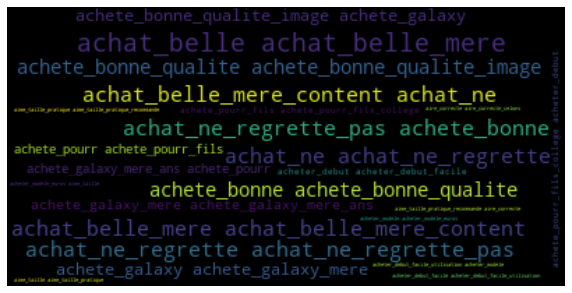

In [132]:
# Generation du Wordcloud
wordcloud = WordCloud(max_words=50).generate(' '.join(list(Sam_pos['combi'])))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()